# GROUP WORK PROJECT #1  
## MScFE 600: Financial Data  
**Group Number:** 8952  

---

### Contributors

| FULL LEGAL NAME                    | LOCATION (COUNTRY) | EMAIL ADDRESS                  |
|------------------------------------|--------------------|--------------------------------|
| Desire Bikorimana                 | Rwanda             | bikorimanadesire@yahoo.com     |
| Cherukumilli Satya Sri Hari Charan| India              | haricharan.nitt@gmail.com      |
| Bismark Mawuenyega Agbemafle      | Ghana              | agbemaflebismark@gmail.com     |

---

## Task 1: Data Quality

### a. Example of Poor Quality Structured Data

Poor quality structured data can take many forms. Consider a **CSV file of loan records** where interest rates are inconsistently formatted—some listed as decimals (e.g., `0.5`) and others as percentages (e.g., `5%`). Additionally, critical columns like `Loan_received_date` and `amount_received` may have missing or improperly formatted values. Similarly, a **sales database** may contain entries with invalid dates (e.g., `"2023-02-30"`), missing customer IDs, and duplicate transaction records (Kimball & Caserta, 2004).

### b. Recognizing Poor Quality in Structured Data

Data quality issues in such structured datasets can be identified using the following criteria:

1. **Validity**: Values like `"2023-02-30"` are invalid since February has only 28 or 29 days (ISO 8000, 2023).
2. **Completeness**: Missing key fields like customer IDs or loan amounts hinder analysis.
3. **Consistency**: Mixing formats (fractions vs percentages) and duplicate records distort analytics and financial metrics.
4. **Metadata Alignment**: Numeric fields may contain non-numeric values, violating expected data types (Consoli et al.).

### c. Example of Poor Quality Unstructured Data

An example of poor quality unstructured data is a **collection of financial news articles** scraped from various websites. These may be cluttered with HTML tags, navigation links, inconsistent formatting, typos, and even irrelevant advertisements. Alternatively, a **corpus of customer feedback emails** may include slang, spelling errors, and incomplete sentences (Batini et al., 2009).

### d. Challenges in Assessing Unstructured Data

Unstructured data often lacks key quality attributes:

1. **Standardization**: Free-form text varies in format, making automated analysis challenging (IBM, 2021).
2. **Accuracy**: Typos, slang (e.g., `"It's gr8!"`), and formatting issues lead to misinterpretation.
3. **Relevance**: HTML artifacts and unrelated content introduce noise and dilute actionable insights.
4. **Structure**: Lack of clear delimiters between useful and irrelevant content hampers natural language processing tasks (Consoli et al.).

---

## Task 2: Yield Curve Modeling — Nelson-Siegel and Cubic Spline

### Objective
The objective of this task is to model the term structure of interest rates using two techniques: the Nelson-Siegel parametric model and a non-parametric cubic spline interpolation. These models will be applied to Indian government bond yields to analyze the shape of the yield curve and assess model accuracy.

### Dataset Description

To model the Indian yield curve, we utilize monthly yield data from the **Reserve Bank of India (RBI)** sourced from their [Government Securities Market database](https://data.rbi.org.in/DBIE/#/dbie/reports/Statistics/Financial%20Market/Government%20Securities%20Market).

We use two primary datasets:

1. **HBS Table No. 180** – *Yield of SGL Transactions in Government Dated Securities for Various Maturities*  
   - Frequency: Monthly  
   - Includes medium- and long-term yields ranging from 1 to 30 years  
   - Source file: `HBS Table No. 180 _ Yield of SGL Transactions in Government Dated Securiites for Various Maturities.txt`

This allows us to construct a cross-sectional yield curve with maturities spanning from **1 to 30 years** — ideal for fitting both the **Nelson-Siegel model** and **Cubic Spline interpolation**.

We select a **single representative month** from the latest available data to focus on the shape of the yield curve at that point in time, aligning with the project’s goal of static curve modeling.

### Data Export and Manual Formatting

The monthly yield data for government dated securities for the financial year **2024–25** was extracted from the RBI’s HBS Table No. 180. We limited the data to **April 2024 to March 2025**, covering maturities from **1 year to 30 years**.

The extracted data was exported to a CSV file (`yield_curve_2024_25.csv`) and then manually formatted to relabel the column headers to reflect full month-year labels (e.g., `"Apr 2024"`, `"May 2024"`, ..., `"Mar 2025"`). The final exported file is named:

> `yield_curve_2024_25.csv`

No additional cleaning steps such as `dropna()` or imputation were necessary, as the dataset did not contain missing values in the selected block.

This clean, structured dataset is now ready for use in **Nelson-Siegel** and **Cubic Spline** yield curve fitting.

### Modeling Approach

**Nelson-Siegel Model**: Fit a parametric model using the functional form:

$$
y(\tau) = \beta_0 + \beta_1 \frac{1 - e^{-\lambda \tau}}{\lambda \tau} + \beta_2 \left( \frac{1 - e^{-\lambda \tau}}{\lambda \tau} - e^{-\lambda \tau} \right)
$$

where:

$$
\tau = \text{time to maturity in years}
$$

$$
\beta_0 = \text{Long-term yield (level)}
$$

$$
\beta_1 = \text{Short-term component (slope)}
$$

$$
\beta_2 = \text{Medium-term curvature}
$$

$$
\lambda = \text{Decay factor controlling the exponential term}
$$

**Cubic Spline Interpolation**: Fit a smooth curve through the yield data using cubic spline interpolation via `scipy.interpolate.make_interp_spline`.

### Evaluation and Interpretation
- Compare the two models using fit metrics such as RMSE or R².
- Plot yield curves to visualize differences in smoothness and fit.
- Discuss the interpretability of parameters in each model and their economic implications.

### Ethical Consideration
We reflect on whether yield curve smoothing introduces bias or obscures important information. The ethical implications of using smoothed models in financial reporting and risk management will be considered.

---

### Importing the CSV File into a DataFrame

We are importing the CSV file located in the project root directory into a pandas DataFrame. This allows us to efficiently manipulate and analyze the data using Python's powerful data analysis library, pandas.

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'yield_curve_2024_25.csv'
yield_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
yield_data.head()

,Maturity,Apr 2024,May 2024,Jun 2024,Jul 2024,Aug 2024,Sep 2024,Oct 2024,Nov 2024,Dec 2024,Jan 2025,Feb 2025,Mar 2025
0,1,7.0735,7.0145,6.9338,6.7992,6.7420,6.6310,6.6261,6.6938,6.6644,6.5840,6.5365,6.4155
1,2,7.1202,7.0055,6.9639,6.8334,6.7555,6.6600,6.6968,6.7023,6.6996,6.5580,6.5614,6.4293
2,3,7.1808,7.0394,6.9800,6.8427,6.7599,6.6680,6.7483,6.6946,6.7043,6.6261,6.5803,6.4375
3,4,7.1930,7.0432,7.0083,6.8393,6.7874,6.6679,6.7629,6.6882,6.7177,6.6325,6.6239,6.4536
4,5,7.1962,7.0387,7.0229,6.8436,6.8048,6.6784,6.7806,6.7432,6.7174,6.6488,6.6534,6.4797


### Nelson-Siegel Model Fitting — March 2025

This code block implements the Nelson-Siegel model to fit the term structure of interest rates observed in **March 2025**. The following steps are performed:

1. **Import Required Libraries:**
   - `numpy` is used for numerical operations such as exponentiation and array manipulation.
   - `matplotlib.pyplot` is used to visualize both observed and fitted yield curves.
   - `scipy.optimize.curve_fit` is used to estimate the model parameters by minimizing the residuals between observed and modeled yields.

2. **Define the Nelson-Siegel Functional Form:**
   The function `nelson_siegel(tau, beta0, beta1, beta2, lambd)` computes the yield at each maturity \( \tau \) using the Nelson-Siegel formula.

3. **Select Observed Data:**
   Yields for the month of **March 2025** are selected from the dataset along with the corresponding maturities (ranging from 1 to 30 years).

4. **Specify Initial Guesses:**

The following initial values are provided for the Nelson-Siegel parameters:

$$
\beta_0 = 6.0 \quad \text{(Level — represents the long-term component)}
$$

$$
\beta_1 = -1.0 \quad \text{(Slope — short-term deviation from the level)}
$$

$$
\beta_2 = 1.0 \quad \text{(Curvature — medium-term hump or dip)}
$$

$$
\lambda = 0.5 \quad \text{(Decay — controls the rate at which slope/curvature diminish)}
$$

5. **Fit the Model:**
   Using `curve_fit`, the function optimizes the parameters to minimize the squared error between the observed and modeled yields.

6. **Extract and Display Parameters:**
   The optimized parameters are extracted and printed for interpretation.

7. **Generate Fitted Curve:**
   The `nelson_siegel` function is re-evaluated using the optimized parameters to generate the fitted yield curve.

8. **Plot Results:**
   A plot is created comparing:
   - The **observed yields** (plotted as discrete points).
   - The **fitted Nelson-Siegel curve** (a continuous line).
   
   This visual comparison helps assess how well the model captures the actual shape of the yield curve for the selected month.

Matplotlib is building the font cache; this may take a moment.


Fitted Parameters: 
Beta0: 7.145719519173111, Beta1: -0.7098038305246168, Beta2: -0.9191077018106922, Lambda: 0.25734228363743034


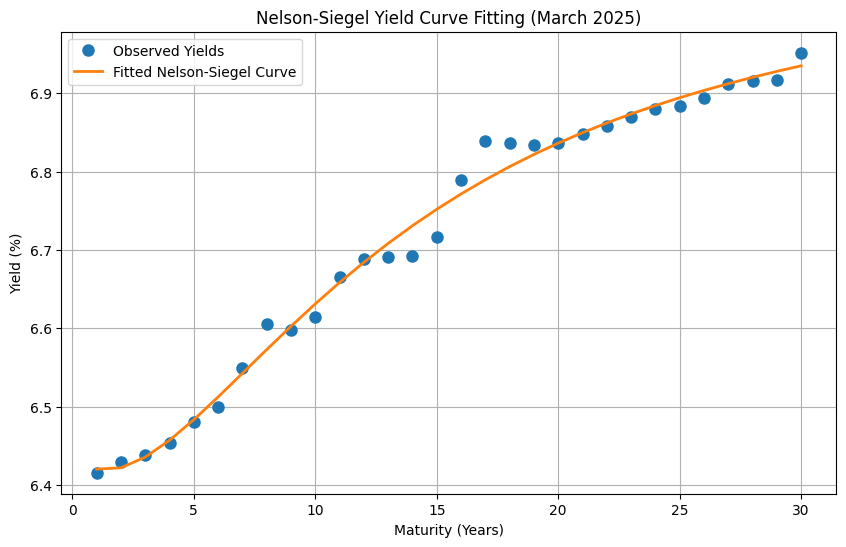

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the Nelson-Siegel functional form
def nelson_siegel(tau, beta0, beta1, beta2, lambd):
    term1 = beta0
    term2 = beta1 * (1 - np.exp(-lambd * tau)) / (lambd * tau)
    term3 = beta2 * ((1 - np.exp(-lambd * tau)) / (lambd * tau) - np.exp(-lambd * tau))
    return term1 + term2 + term3

# Select the data for March 2025
maturities = yield_data['Maturity'].values
yields = yield_data['Mar 2025'].values

# Initial parameter guesses for beta0, beta1, beta2, and lambda
initial_params = [6.0, -1.0, 1.0, 0.5]

# Fit the Nelson-Siegel model to the data
params, _ = curve_fit(nelson_siegel, maturities, yields, p0=initial_params)

# Extract the fitted parameters
beta0, beta1, beta2, lambd = params
print(f"Fitted Parameters: \nBeta0: {beta0}, Beta1: {beta1}, Beta2: {beta2}, Lambda: {lambd}")

# Generate fitted yields
fitted_yields = nelson_siegel(maturities, beta0, beta1, beta2, lambd)

# Plot observed vs fitted yields
plt.figure(figsize=(10, 6))
plt.plot(maturities, yields, 'o', label='Observed Yields', markersize=8)
plt.plot(maturities, fitted_yields, '-', label='Fitted Nelson-Siegel Curve', linewidth=2)
plt.title('Nelson-Siegel Yield Curve Fitting (March 2025)')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()